# Modelo preditivo para aprovação de crédito

### Autor: Miguel Burg Demay
#### miguelburgdemay@gmail.com

#### Janeiro/22

# Sumário

1. Resumo Executivo 
2. Introdução
3. Preparação dos dados
4. Desenvolvimento do modelo preditivo
5. Aplicação do modelo preditivo ao dataset de teste
6. Conclusão

# 1. Resumo Executivo 



No objetivo de desenvolver um modelo preditivo para aprovação de crédito, foi realizado inicialmente o pré-processamento dos dados dos datasets de treinamento e teste. Observou-se que duas variáveis, *salario_mensal* e *numero_de_dependentes*, possuíam valores inválidos, que podem ser eliminados da análise. Entretanto, pela grande quantidade de pontos associados, optou-se por uma outra abordagem, alterando seus valores nos datasets de treinamento e teste pelos valores médios e de moda, respectivamente, uma vez que a segunda variável é discreta. 

Em seguida, iniciou-se a remoção de *outliers*, procedimento onde a análise de contexto das variáveis é fundamental. 
Por se tratar de um estudo de caso, foi desenvolvida uma análise sem o aprofundamento no contexto, buscando identificar pontos espúrios em ambos datasets, mas sem alterá-los em demasia. 

Para cada variável, foi observado se ela era discreta ou contínua, no intuito de corrigir possíveis valores com ponto flutuante em variáveis discretas. Não foram encontrados. 

Em seguida, observou-se os valores da variável, em gráficos de linhas ou de dispersão, em ambos datasets, a fim de analisar o comportamento da variável. Foi observado que todas as variáveis apresentavam pontos extremos para valores elevados. Assim, filtrou-se os pontos considerados espúrios, limitando a análise a 99,75\% dos pontos das variáveis. Tal valor foi escolhido por estar associado a 6 desvios-padrão de uma distribuição normal.

O resultado da aplicação do filtro foi observado em histogramas e gráficos de caixa (*boxplot*). De modo geral, os gráficos mostram que os comportamentos estatísticos das variáveis estão coerentes (com o conhecimento disponível), com a reduzida presença de pontos extremos, fora do limite IQR superior. 

Pensou-se inicialmente em eliminar tais pontos da análise. Porém, como existiam no dataset de treinamento e teste, e com o conhecimento disponível, considera-se que sejam válidos, representativos da realidade, devendo assim ser mantidos no dataset de teste. Poderiam ser eliminados do dataset de treinamento; porém, o modelo poderia apresentar falhas de extrapolação, uma vez que existiriam pontos no dataset de teste fora dos limites do dataset de treinamento. Optou-se, neste exercício, por manter tais pontos. 
 
Tais decisões foram tomadas nesse exercício, mas poderiam ser alteradas com maior conhecimento do contexto das variáveis. 


Para a variável *util_linhas_inseguras*, tal filtro limitou o conjunto de dados a valores inferiores a 2. Observou-se uma distribuição exponencial, com muitos pontos em 0 e poucos acima de 1,5, o que acredita-se ser o comportamento esperado. 

A variável *idade* apresenta valores nulos, que foram eliminados da análise. Ela apresenta comportamento bastante 
próximo de uma distribuição normal, limitada entre 21 e 91 anos. 

A terceira variável analisada, *vezes_passou_de_30_59_dias*, apresenta um conjunto de valores concentrados em uma região abaixo de 20, e outro próximo a 100. Com o filtro, os valores elevados foram eliminados. A variável apresenta comportamento exponencial, com muitos pontos em 0 e poucos em 6, o que acredita-se condizer com o esperado.

A variável *razao_debito* apresenta valores extremamente elevados, que foram eliminados da análise pelo filtro anteriormente descrito. Entretanto, 99,75\% dos clientes apresentam valores de razao_debito menores de 7.800 (aproximadamente). Embora tal valor seja considerado bastante elevado, optou-se por manter tais dados na análise, pela presente limitação de conhecimento. Com isso, a variável adquire um comportamento exponencial, com muitos pontos próximos a 0 e poucos próximos a 8.000.

A quinta variável, *salario_mensal*, possui comportamento assimétrico, deslocado à esquerda, com mediana em 6.500 e decaindo até 44.000. Apresenta valores próximos a 0, os quais não foram eliminados da análise por poderem representar situações reais. Acredita-se ser o comportamento esperado, mas falta contexto para a validação de tal crença.

A variável *numero_linhas_crdto_aberto* também apresenta comportamento deslocado à esquerda, com mediana em 8 decaindo até 30. Apresenta valores próximos a 0, o que se acredita ser o comportamento esperado. 

A sétima variável analisada, *numero_vezes_passou_90_dias*, apresenta comportamento exponencial, com muito pontos de valor 0 e decaindo até 4, o que se acredita ser condizente com a situação real. 

A variável *numero_emprestimos_imobiliarios* apresenta comportamento decrescente, com a quantidade de clientes com nenhum ou um empréstimo muito maior do que para valores maiores, sendo bastante diminuta em 6, o que se acredita ser condizente com a situação real. 

As variáveis *numero_de_vezes_que_passou_60_89_dias* e *numero_de_dependentes* apresentam comportamentos exponenciais decrescentes, com alta concentração de pontos de valor 0 e decaindo até seus limites, 3 e 5, respectivamente





Com as variáveis tratadas, foi desenvolvido um modelo de predição. Foi analisada a correlação entre variáveis, as quais não apresentaram valores próximos a 1 ou -1. Optou-se, assim, por usar todas as 10 variáveis para a construção do modelo. Posteriormente, o modelo foi reconstruído com as 5 variáveis de maior correlação com a variável dependente - *inadimplente*, o que não mostrou melhorias na resposta obtida. 

Foi realizado um escalonamento das variáveis, com *StandardScaler*, *MinMaxScaler* e *RobustScaler*. Todos apresentaram respostas muito semelhantes, com uma discreta vantagem para o método *StandardScaler*. 

Para a construção do modelo de classificação, foi empregado o algoritmo de regressão logística, pela possibilidade de calcular a probabilidade do cliente ser inadimplente, objetivo do exercício. O dataset de treinamento foi dividido em dois, sendo 30% para teste e 70% para a construção do modelo. 

Como resultado, obteve-se um jaccard score de 0,94 e um log-loss de 0,18, bons indicativos da qualidade do modelo desenvolvido. 

O modelo apresenta um índice F1-score de 0,97 para clientes adimplentes, o que é um resultado bastante interessante, mas que poderia ser alvo de uma análise de *overfitting*. Por outro lado, o F1-score para clientes inadimplentes é baixo, 0,24. Em geral, o modelo apresenta uma exatidão média de 0,60, mas tal valor sobe para 0,92 quando se analisa a média ponderada. 

A conclusão é que o modelo é bastante adequado para classificar clientes adimplentes como adimplentes, e precisa ser melhorado para clientes inadimplentes, pois apresenta alto grau de falsos negativos. Acredita-se que tal fato se deva à baixa quantidade de clientes inadimplentes no dataset analisado - 6,3% da quantidade total de clientes. 

Por fim, o modelo desenvolvido foi aplicado ao dataset de teste. Os pontos inválidos do dataset foram substituídos por valores médios ou de moda, como anteriormente exposto, mas sem remoção de *outliers*. O resultado é apresentado no arquivo "teste.csv", enviado em anexo a este documento. 

Foi analisado em gráficos de dispersão a coerência da resposta do modelo com as variáveis. Observou-se boa coerência entre as respostas com o comportamento esperado, com o conhecimento disponível. 


# 2. Introdução

O presente relatório apresenta o desenvolvimento de um modelo preditivo para análise de crédito. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import statistics as stat
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score 
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


Bad key "text.kerning_factor" on line 4 in
C:\Users\mbd\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
file= 'treino.csv'
tr_data = pd.read_csv(file)
tr_data.shape

(110000, 11)

In [3]:
file= 'teste.csv'
tt_data = pd.read_csv(file)
tt_data.shape

(40000, 11)

Cada linha representa um cliente e as colunas representam os dados (informações) desses clientes. 
A variável resposta é a coluna inadimplente, que indica se o tomador veio a se tornar inadimplente(1) ou não(0).
As variáveis da base de dados são descritas abaixo:
* idade: A idade do cliente..
* numero_de_dependentes: O número de pessoas dependentes do cliente.
* salario_mensal: Salário mensal do cliente.
* numero_emprestimos_imobiliarios: Quantidade de empréstimos imobiliários que o cliente possui em aberto.
* numero_vezes_passou_90_dias: Número de vezes que o tomador passou mais de 90 dias em atraso.
* util_linhas_inseguras: Quanto que o cliente está usando, relativamente ao limite dele, de linhas de crédito que não são seguradas por qualquer bem do tomador e.g: imoveis, carros etc.
* vezes_passou_de_30_59_dias: Número de vezes que o cliente atrasou, entre 30 e 59 dias, o pagamento de um empréstimo.
* razao_debito: Razão entre as dívidas e o patrimônio do tomador. razão débito = Dividas/Patrimônio
* numero_linhas_crdto_aberto: Número de empréstimos em aberto pelo cliente.
* numero_de_vezes_que_passou_60_89_dias: Número de vezes que o cliente atrasou, entre 60 e 89 dias, o pagamento de um empréstimo.


# 3. Preparação dos dados

Análises de dados possuem três principais fontes de incerteza:
* incerteza dos dados: referente à variação natural dos dados e à incerteza do sistema de aquisição dos mesmos
* incompletude do domínio: associada com a capacidade dos dados de representarem a informação desejada.
* imperfeição de modelos: modelos são simplificações de situações complexas e, portanto, possuem erros associados à falta de conhecimento do sistema representado.

Para minimizar tais fontes de incerteza, é fundamental que o conjunto de dados seja preparado, de modo a separar informação e ruído, empregando apenas o conteúdo relevante para o desenvolvimento do modelo preditivo.

Inicia-se, portanto, analisando os dados de entrada. 

Para a preparação dos dados, é necessária a identificação da existência de dados incoerentes



In [4]:
tr_data.isnull().sum()

inadimplente                                 0
util_linhas_inseguras                        0
idade                                        0
vezes_passou_de_30_59_dias                   0
razao_debito                                 0
salario_mensal                           21763
numero_linhas_crdto_aberto                   0
numero_vezes_passou_90_dias                  0
numero_emprestimos_imobiliarios              0
numero_de_vezes_que_passou_60_89_dias        0
numero_de_dependentes                     2878
dtype: int64

In [5]:
tt_data.isnull().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [6]:
#tr_data.dropna(inplace=True)
tr_data['salario_mensal']=tr_data['salario_mensal'].fillna(tr_data['salario_mensal'].mean())
tr_data['numero_de_dependentes']=tr_data['numero_de_dependentes'].fillna(stat.mode(tr_data['numero_de_dependentes']))
tr_data.shape

(110000, 11)

In [7]:
#tt_data.dropna(inplace=True)
tt_data['salario_mensal']=tt_data['salario_mensal'].fillna(tt_data['salario_mensal'].mean())
tt_data['numero_de_dependentes']=tt_data['numero_de_dependentes'].fillna(stat.mode(tt_data['numero_de_dependentes']))
tt_data.shape


(40000, 11)

Por sua vez, a análise de *outliers* requer mais cuidado. *outliers* são pontos que podem ser descartados da análise, desde que não portem informação relevante. Assim, cada variável será analisada individualmente.  

## Variável 1: util_linhas_inseguras

A variável *util_linhas_inseguras* representa quanto que o cliente está usando, relativamente ao limite dele, de linhas de crédito que não são seguradas por qualquer bem do tomador e.g: imoveis, carros etc.
O gráfico abaixo evidencia a existência de valores consideravelmente elevados para tal variável.

In [8]:
tr_data['util_linhas_inseguras'].dtypes

dtype('float64')

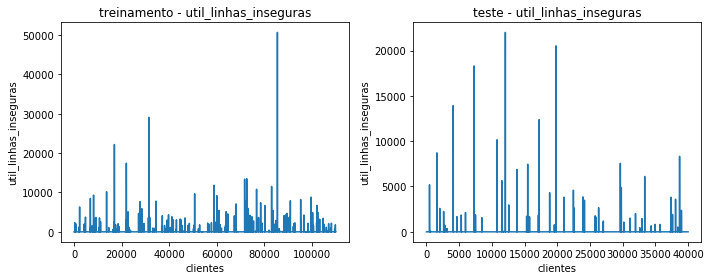

In [9]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(tr_data['util_linhas_inseguras'])
axs[0].set(title='treinamento - util_linhas_inseguras',ylabel='util_linhas_inseguras',xlabel='clientes')
axs[1].plot(tt_data['util_linhas_inseguras'])
axs[1].set(title='teste - util_linhas_inseguras',ylabel='util_linhas_inseguras',xlabel='clientes')
a=plt.tight_layout()



In [10]:
tr_data['util_linhas_inseguras'].quantile(0.9975),tt_data['util_linhas_inseguras'].quantile(0.9975)


(1.9900483581850141, 1.9880712627425219)

In [11]:
threshold=0.9975
tr_data = tr_data[tr_data['util_linhas_inseguras']<=tr_data['util_linhas_inseguras'].quantile(threshold)]
tr_data.shape

(109725, 11)

In [12]:
tt_data = tt_data[tt_data['util_linhas_inseguras']<=tt_data['util_linhas_inseguras'].quantile(threshold)]
tt_data.shape

(39900, 11)

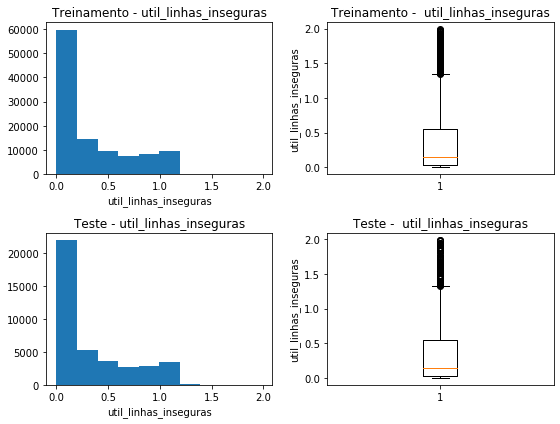

In [13]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['util_linhas_inseguras'])
ax[0,1].boxplot(tr_data['util_linhas_inseguras'])

ax[1,0].hist(tt_data['util_linhas_inseguras'])
ax[1,1].boxplot(tt_data['util_linhas_inseguras'])

ax[0,0].set(title='Treinamento - util_linhas_inseguras',xlabel='util_linhas_inseguras')
ax[0,1].set(title='Treinamento -  util_linhas_inseguras',ylabel='util_linhas_inseguras')
ax[1,0].set(title='Teste - util_linhas_inseguras',xlabel='util_linhas_inseguras')
ax[1,1].set(title='Teste -  util_linhas_inseguras',ylabel='util_linhas_inseguras')
plt.tight_layout()

## Variável 2: idade

A variável "idade" representa a idade do cliente. 

Excetuando-se um ponto de valor 0 no dataset de treinamento, a variável apresenta comportamento estatístico muito similar em ambos datasets. 

In [14]:
tr_data['idade'].dtypes

dtype('int64')

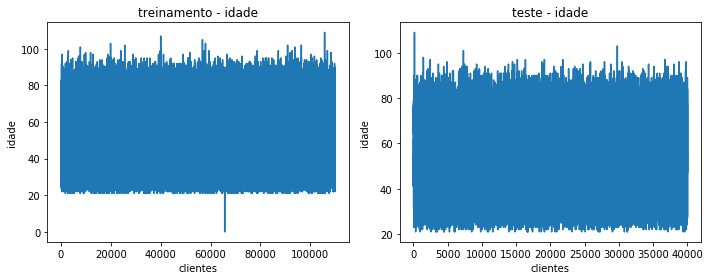

In [15]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(tr_data['idade'])
axs[0].set(title='treinamento - idade',ylabel='idade',xlabel='clientes')
axs[1].plot(tt_data['idade'])
axs[1].set(title='teste - idade',ylabel='idade',xlabel='clientes')
a=plt.tight_layout()

In [16]:
tr_data=tr_data[tr_data['idade']>0]
tr_data['idade'].quantile(0.9975),tt_data['idade'].quantile(0.9975)

(91.0, 91.0)

In [17]:
threshold=0.9975
tr_data = tr_data[tr_data['idade']<=tr_data['idade'].quantile(threshold)]
tt_data = tt_data[tt_data['idade']<=tt_data['idade'].quantile(threshold)]

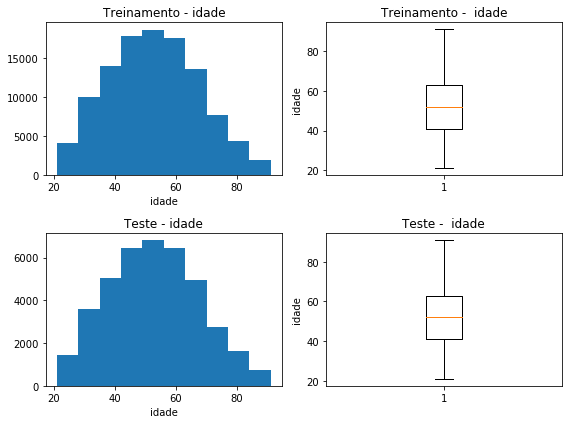

In [18]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['idade'])
ax[0,1].boxplot(tr_data['idade'])

ax[1,0].hist(tt_data['idade'])
ax[1,1].boxplot(tt_data['idade'])

ax[0,0].set(title='Treinamento - idade',xlabel='idade')
ax[0,1].set(title='Treinamento -  idade',ylabel='idade')
ax[1,0].set(title='Teste - idade',xlabel='idade')
ax[1,1].set(title='Teste -  idade',ylabel='idade')
plt.tight_layout()

## Variável 3: vezes_passou_de_30_59_dias

A variável "vezes_passou_de_30_59_dias" representa o número de vezes que o cliente atrasou, entre 30 e 59 dias, o pagamento de um empréstimo. Pelo gráfico seguinte, nota-se que os pontos estão distribuídos entre duas regiões claramente distintas: em torno de 100 e abaixo de 20. Tudo indica que os pontos mais altos estejam associados ao ruído, e não à informação. 


In [19]:
tr_data['vezes_passou_de_30_59_dias'].dtypes

dtype('int64')

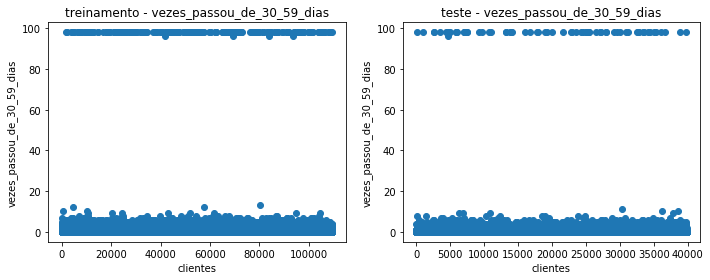

In [20]:
x1=np.linspace(0,tr_data.shape[0],tr_data.shape[0])
x2=np.linspace(0,tt_data.shape[0],tt_data.shape[0])
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].scatter(x1,tr_data['vezes_passou_de_30_59_dias'])
axs[0].set(title='treinamento - vezes_passou_de_30_59_dias',ylabel='vezes_passou_de_30_59_dias',xlabel='clientes')
axs[1].scatter(x2,tt_data['vezes_passou_de_30_59_dias'])
axs[1].set(title='teste - vezes_passou_de_30_59_dias',ylabel='vezes_passou_de_30_59_dias',xlabel='clientes')
a=plt.tight_layout()

In [21]:
tt_data['vezes_passou_de_30_59_dias'].quantile(0.9975),tr_data['vezes_passou_de_30_59_dias'].quantile(0.9975)

(6.0, 6.0)

In [22]:
threshold=0.9975
tr_data = tr_data[tr_data['vezes_passou_de_30_59_dias']<=tr_data['vezes_passou_de_30_59_dias'].quantile(threshold)]
tt_data = tt_data[tt_data['vezes_passou_de_30_59_dias']<=tt_data['vezes_passou_de_30_59_dias'].quantile(threshold)]

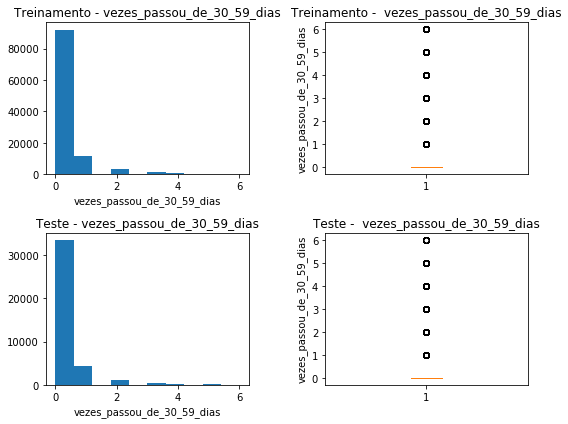

In [23]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['vezes_passou_de_30_59_dias'])
ax[0,1].boxplot(tr_data['vezes_passou_de_30_59_dias'])

ax[1,0].hist(tt_data['vezes_passou_de_30_59_dias'])
ax[1,1].boxplot(tt_data['vezes_passou_de_30_59_dias'])

ax[0,0].set(title='Treinamento - vezes_passou_de_30_59_dias',xlabel='vezes_passou_de_30_59_dias')
ax[0,1].set(title='Treinamento -  vezes_passou_de_30_59_dias',ylabel='vezes_passou_de_30_59_dias')
ax[1,0].set(title='Teste - vezes_passou_de_30_59_dias',xlabel='vezes_passou_de_30_59_dias')
ax[1,1].set(title='Teste -  vezes_passou_de_30_59_dias',ylabel='vezes_passou_de_30_59_dias')
plt.tight_layout()

## Variável 4: razão_débito

A quarta variável analisada, razao_debito, representa a razão entre as dívidas e o patrimônio do tomador. De forma sucinta, razão débito = Dividas/Patrimônio. 

In [24]:
tt_data['razao_debito'].dtypes

dtype('float64')

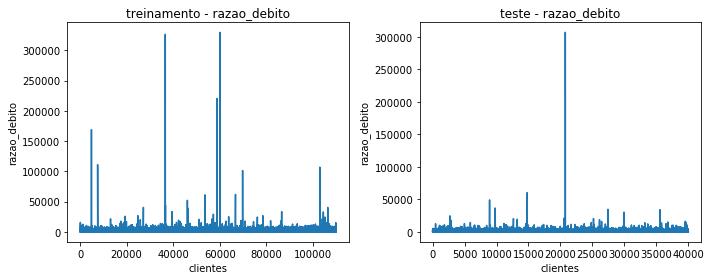

In [25]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(tr_data['razao_debito'])
axs[0].set(title='treinamento - razao_debito',ylabel='razao_debito',xlabel='clientes')
axs[1].plot(tt_data['razao_debito'])
axs[1].set(title='teste - razao_debito',ylabel='razao_debito',xlabel='clientes')
a=plt.tight_layout()

In [26]:
tr_data['razao_debito'].quantile(0.9975),tt_data['razao_debito'].quantile(0.9975)

(7787.91250000002, 7809.425000000003)

In [27]:
threshold=0.9975
tr_data = tr_data[tr_data['razao_debito']<=tr_data['razao_debito'].quantile(threshold)]
tt_data = tt_data[tt_data['razao_debito']<=tt_data['razao_debito'].quantile(threshold)]

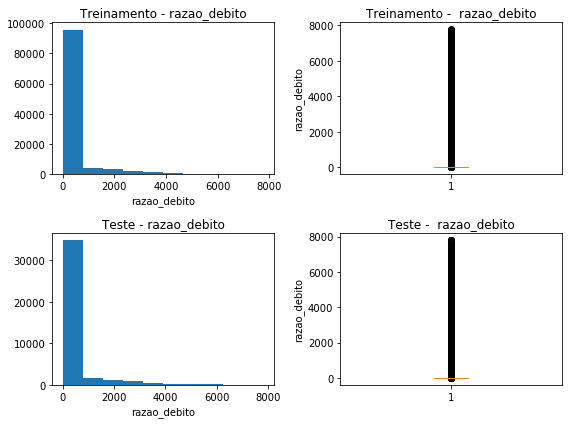

In [28]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['razao_debito'])
ax[0,1].boxplot(tr_data['razao_debito'])

ax[1,0].hist(tt_data['razao_debito'])
ax[1,1].boxplot(tt_data['razao_debito'])

ax[0,0].set(title='Treinamento - razao_debito',xlabel='razao_debito')
ax[0,1].set(title='Treinamento -  razao_debito',ylabel='razao_debito')
ax[1,0].set(title='Teste - razao_debito',xlabel='razao_debito')
ax[1,1].set(title='Teste -  razao_debito',ylabel='razao_debito')
plt.tight_layout()

## Variável 5: salario_mensal

A variável salario_mensal representa o salário mensal do cliente. 

In [29]:
tt_data['salario_mensal'].dtypes

dtype('float64')

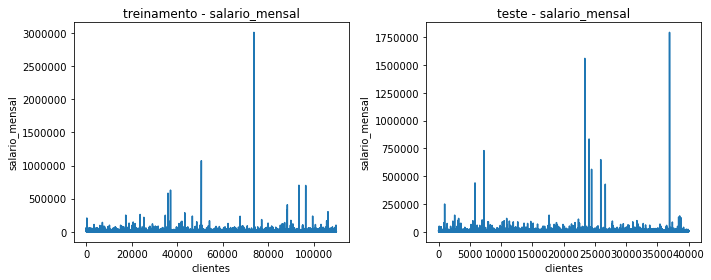

In [30]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(tr_data['salario_mensal'])
axs[0].set(title='treinamento - salario_mensal',ylabel='salario_mensal',xlabel='clientes')
axs[1].plot(tt_data['salario_mensal'])
axs[1].set(title='teste - salario_mensal',ylabel='salario_mensal',xlabel='clientes')
a=plt.tight_layout()

In [31]:
tr_data['salario_mensal'].quantile(0.9975),tt_data['salario_mensal'].quantile(0.9975)

(44200.0, 44984.02500000062)

In [32]:
threshold=0.9975
tr_data = tr_data[tr_data['salario_mensal']<=tr_data['salario_mensal'].quantile(threshold)]
tt_data = tt_data[tt_data['salario_mensal']<=tt_data['salario_mensal'].quantile(threshold)]


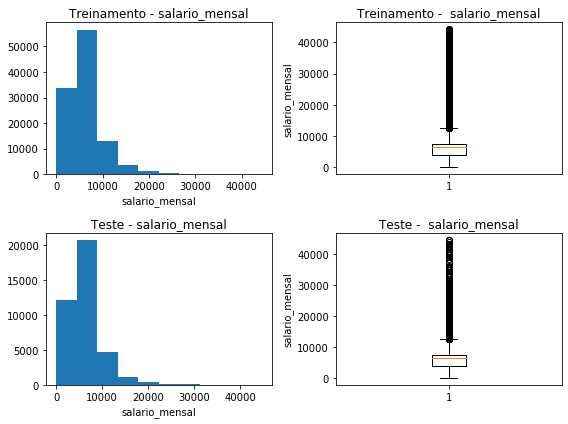

In [33]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['salario_mensal'])
ax[0,1].boxplot(tr_data['salario_mensal'])

ax[1,0].hist(tt_data['salario_mensal'])
ax[1,1].boxplot(tt_data['salario_mensal'])

ax[0,0].set(title='Treinamento - salario_mensal',xlabel='salario_mensal')
ax[0,1].set(title='Treinamento -  salario_mensal',ylabel='salario_mensal')
ax[1,0].set(title='Teste - salario_mensal',xlabel='salario_mensal')
ax[1,1].set(title='Teste -  salario_mensal',ylabel='salario_mensal')
plt.tight_layout()

Text(0.5, 1.0, 'Histograma dos salários dos clientes de menos salário')

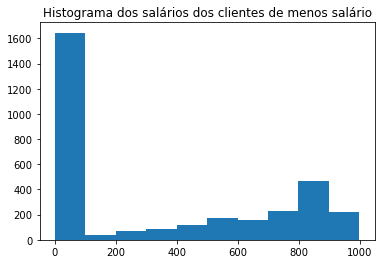

In [34]:
tr_data2 = tr_data[tr_data['salario_mensal']<1000]
a,b,c=plt.hist(tr_data2['salario_mensal'])
plt.title('Histograma dos salários dos clientes de menos salário')

In [35]:
tr_data['salario_mensal'].quantile(0.012),tt_data['salario_mensal'].quantile(0.012)


(1.0, 1.0)

In [36]:
tr_data['salario_mensal'].describe()

count    108660.000000
mean       6398.029305
std        4031.068362
min           0.000000
25%        3900.000000
50%        6522.000000
75%        7353.000000
max       44200.000000
Name: salario_mensal, dtype: float64

In [37]:
tr_data['salario_mensal'].median()

6522.0

## Variável 6: numero_linhas_crdto_aberto

A variável "numero_linhas_crdto_aberto" representa a quantidade de empréstimos em aberto pelo cliente. 

In [38]:
tr_data['numero_linhas_crdto_aberto'].dtypes

dtype('int64')

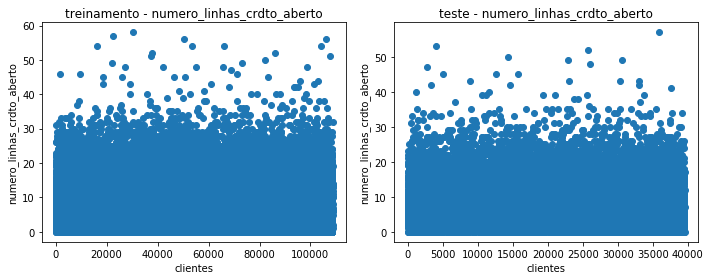

In [39]:
x1=np.linspace(0,tr_data.shape[0],tr_data.shape[0])
x2=np.linspace(0,tt_data.shape[0],tt_data.shape[0])
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].scatter(x1,tr_data['numero_linhas_crdto_aberto'])
axs[0].set(title='treinamento - numero_linhas_crdto_aberto',ylabel='numero_linhas_crdto_aberto',xlabel='clientes')
axs[1].scatter(x2,tt_data['numero_linhas_crdto_aberto'])
axs[1].set(title='teste - numero_linhas_crdto_aberto',ylabel='numero_linhas_crdto_aberto',xlabel='clientes')
a=plt.tight_layout()

In [40]:
tr_data['numero_linhas_crdto_aberto'].quantile(0.9975),tt_data['numero_linhas_crdto_aberto'].quantile(0.9975)

(30.0, 31.0)

In [41]:
threshold=0.9975
tr_data = tr_data[tr_data['numero_linhas_crdto_aberto']<=tr_data['numero_linhas_crdto_aberto'].quantile(threshold)]
tt_data = tt_data[tt_data['numero_linhas_crdto_aberto']<=tt_data['numero_linhas_crdto_aberto'].quantile(threshold)]

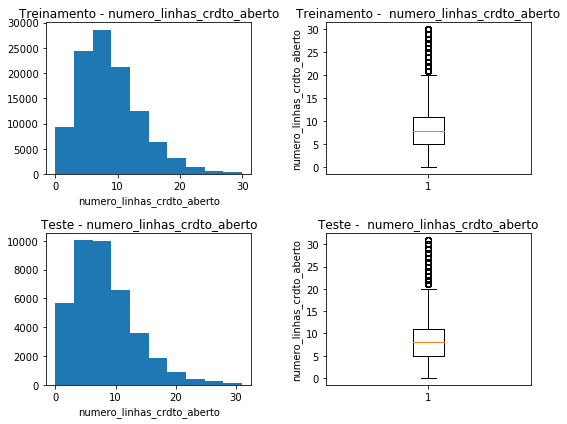

In [42]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['numero_linhas_crdto_aberto'])
ax[0,1].boxplot(tr_data['numero_linhas_crdto_aberto'])

ax[1,0].hist(tt_data['numero_linhas_crdto_aberto'])
ax[1,1].boxplot(tt_data['numero_linhas_crdto_aberto'])

ax[0,0].set(title='Treinamento - numero_linhas_crdto_aberto',xlabel='numero_linhas_crdto_aberto')
ax[0,1].set(title='Treinamento -  numero_linhas_crdto_aberto',ylabel='numero_linhas_crdto_aberto')
ax[1,0].set(title='Teste - numero_linhas_crdto_aberto',xlabel='numero_linhas_crdto_aberto')
ax[1,1].set(title='Teste -  numero_linhas_crdto_aberto',ylabel='numero_linhas_crdto_aberto')
plt.tight_layout()

In [43]:
tr_data['numero_linhas_crdto_aberto'].median()

8.0

## Variável 7: numero_vezes_passou_90_dias

A variável "numero_vezes_passou_90_dias" representa a quantidade de vezes que o tomador passou mais de 90 dias em atraso. 

In [44]:
tr_data['numero_vezes_passou_90_dias'].dtypes

dtype('int64')

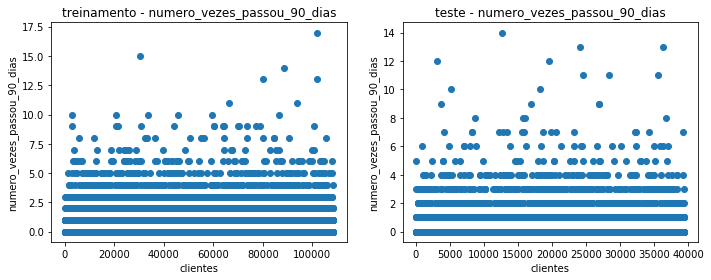

In [45]:
x1=np.linspace(0,tr_data.shape[0],tr_data.shape[0])
x2=np.linspace(0,tt_data.shape[0],tt_data.shape[0])
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].scatter(x1,tr_data['numero_vezes_passou_90_dias'])
axs[0].set(title='treinamento - numero_vezes_passou_90_dias',ylabel='numero_vezes_passou_90_dias',xlabel='clientes')
axs[1].scatter(x2,tt_data['numero_vezes_passou_90_dias'])
axs[1].set(title='teste - numero_vezes_passou_90_dias',ylabel='numero_vezes_passou_90_dias',xlabel='clientes')
a=plt.tight_layout()

In [46]:
tr_data['numero_vezes_passou_90_dias'].quantile(0.9975),tt_data['numero_vezes_passou_90_dias'].quantile(0.9975)

(4.0, 4.0)

In [47]:
threshold=0.9975
tr_data = tr_data[tr_data['numero_vezes_passou_90_dias']<=tr_data['numero_vezes_passou_90_dias'].quantile(threshold)]
tt_data = tt_data[tt_data['numero_vezes_passou_90_dias']<=tt_data['numero_vezes_passou_90_dias'].quantile(threshold)]

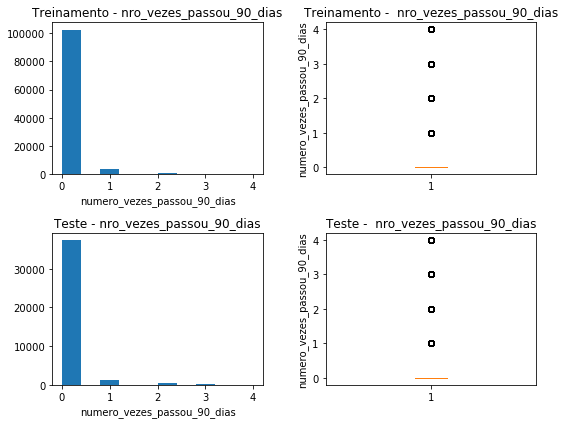

In [48]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['numero_vezes_passou_90_dias'])
ax[0,1].boxplot(tr_data['numero_vezes_passou_90_dias'])

ax[1,0].hist(tt_data['numero_vezes_passou_90_dias'])
ax[1,1].boxplot(tt_data['numero_vezes_passou_90_dias'])

ax[0,0].set(title='Treinamento - nro_vezes_passou_90_dias',xlabel='numero_vezes_passou_90_dias')
ax[0,1].set(title='Treinamento -  nro_vezes_passou_90_dias',ylabel='numero_vezes_passou_90_dias')
ax[1,0].set(title='Teste - nro_vezes_passou_90_dias',xlabel='numero_vezes_passou_90_dias')
ax[1,1].set(title='Teste -  nro_vezes_passou_90_dias',ylabel='numero_vezes_passou_90_dias')
plt.tight_layout()

## Variável 8: numero_emprestimos_imobiliarios

A variável "numero_emprestimos_imobiliarios" representa a quantidade de empréstimos imobiliários que o cliente possui em aberto. 

In [49]:
tr_data['numero_emprestimos_imobiliarios'].dtypes

dtype('int64')

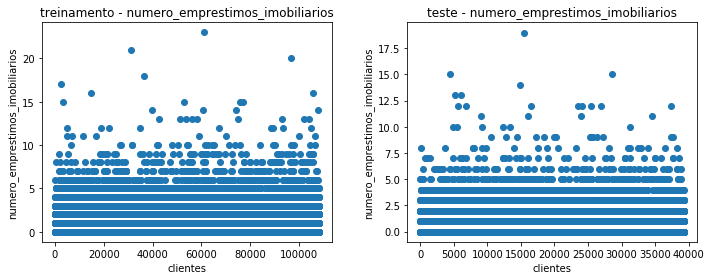

In [50]:
x1=np.linspace(0,tr_data.shape[0],tr_data.shape[0])
x2=np.linspace(0,tt_data.shape[0],tt_data.shape[0])
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].scatter(x1,tr_data['numero_emprestimos_imobiliarios'])
axs[0].set(title='treinamento - numero_emprestimos_imobiliarios',ylabel='numero_emprestimos_imobiliarios',xlabel='clientes')
axs[1].scatter(x2,tt_data['numero_emprestimos_imobiliarios'])
axs[1].set(title='teste - numero_emprestimos_imobiliarios',ylabel='numero_emprestimos_imobiliarios',xlabel='clientes')
a=plt.tight_layout()

In [51]:
tr_data['numero_emprestimos_imobiliarios'].quantile(0.9975),tt_data['numero_emprestimos_imobiliarios'].quantile(0.9975)

(7.0, 6.0)

In [52]:
threshold=0.9975
tr_data = tr_data[tr_data['numero_emprestimos_imobiliarios']<=tr_data['numero_emprestimos_imobiliarios'].quantile(threshold)]
tt_data = tt_data[tt_data['numero_emprestimos_imobiliarios']<=tt_data['numero_emprestimos_imobiliarios'].quantile(threshold)]

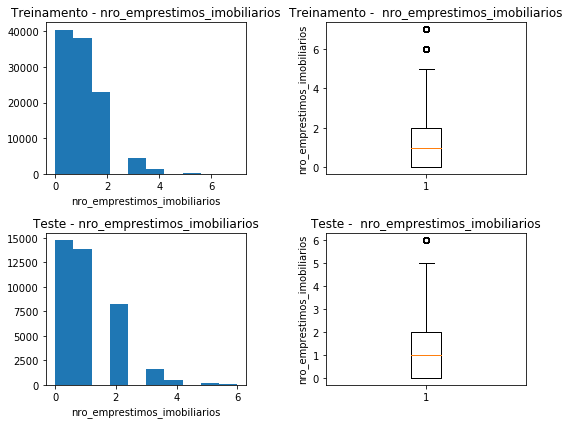

In [53]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['numero_emprestimos_imobiliarios'])
ax[0,1].boxplot(tr_data['numero_emprestimos_imobiliarios'])

ax[1,0].hist(tt_data['numero_emprestimos_imobiliarios'])
ax[1,1].boxplot(tt_data['numero_emprestimos_imobiliarios'])

ax[0,0].set(title='Treinamento - nro_emprestimos_imobiliarios',xlabel='nro_emprestimos_imobiliarios')
ax[0,1].set(title='Treinamento -  nro_emprestimos_imobiliarios',ylabel='nro_emprestimos_imobiliarios')
ax[1,0].set(title='Teste - nro_emprestimos_imobiliarios',xlabel='nro_emprestimos_imobiliarios')
ax[1,1].set(title='Teste -  nro_emprestimos_imobiliarios',ylabel='nro_emprestimos_imobiliarios')
plt.tight_layout()

## Variável 9: numero_de_vezes_que_passou_60_89_dias

A variável representa o número de vezes que o cliente atrasou, entre 60 e 89 dias, o pagamento de um empréstimo

In [54]:
tr_data['numero_de_vezes_que_passou_60_89_dias'].dtypes

dtype('int64')

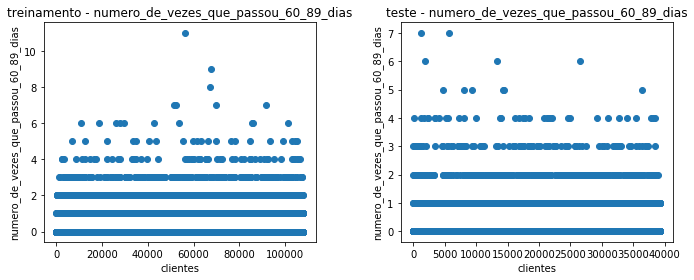

In [55]:
x1=np.linspace(0,tr_data.shape[0],tr_data.shape[0])
x2=np.linspace(0,tt_data.shape[0],tt_data.shape[0])
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].scatter(x1,tr_data['numero_de_vezes_que_passou_60_89_dias'])
axs[0].set(title='treinamento - numero_de_vezes_que_passou_60_89_dias',ylabel='numero_de_vezes_que_passou_60_89_dias',xlabel='clientes')
axs[1].scatter(x2,tt_data['numero_de_vezes_que_passou_60_89_dias'])
axs[1].set(title='teste - numero_de_vezes_que_passou_60_89_dias',ylabel='numero_de_vezes_que_passou_60_89_dias',xlabel='clientes')
a=plt.tight_layout()

In [56]:
tr_data['numero_de_vezes_que_passou_60_89_dias'].quantile(0.9975),tt_data['numero_de_vezes_que_passou_60_89_dias'].quantile(0.9975)

(3.0, 3.0)

In [57]:
threshold=0.9975
tr_data = tr_data[tr_data['numero_de_vezes_que_passou_60_89_dias']<=tr_data['numero_de_vezes_que_passou_60_89_dias'].quantile(threshold)]
tt_data = tt_data[tt_data['numero_de_vezes_que_passou_60_89_dias']<=tt_data['numero_de_vezes_que_passou_60_89_dias'].quantile(threshold)]

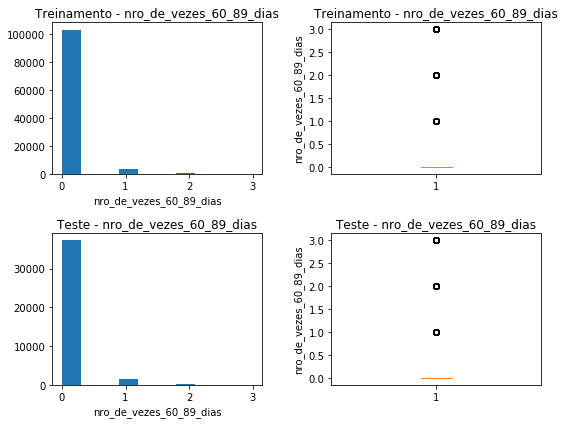

In [58]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['numero_de_vezes_que_passou_60_89_dias'])
ax[0,1].boxplot(tr_data['numero_de_vezes_que_passou_60_89_dias'])

ax[1,0].hist(tt_data['numero_de_vezes_que_passou_60_89_dias'])
ax[1,1].boxplot(tt_data['numero_de_vezes_que_passou_60_89_dias'])

ax[0,0].set(title='Treinamento - nro_de_vezes_60_89_dias',xlabel='nro_de_vezes_60_89_dias')
ax[0,1].set(title='Treinamento - nro_de_vezes_60_89_dias',ylabel='nro_de_vezes_60_89_dias')
ax[1,0].set(title='Teste - nro_de_vezes_60_89_dias',xlabel='nro_de_vezes_60_89_dias')
ax[1,1].set(title='Teste - nro_de_vezes_60_89_dias',ylabel='nro_de_vezes_60_89_dias')
plt.tight_layout()

## Variável 10: numero_de_dependentes

A variável representa o número de dependentes do cliente

In [59]:
tr_data['numero_de_dependentes'].dtypes,tt_data['numero_de_dependentes'].dtypes

(dtype('float64'), dtype('float64'))

In [60]:
tr_data['numero_de_dependentes']=tr_data['numero_de_dependentes'].astype(int)
tt_data['numero_de_dependentes']=tt_data['numero_de_dependentes'].astype(int)

In [61]:
tr_data['numero_de_dependentes'].quantile(0.9975),tt_data['numero_de_dependentes'].quantile(0.9975)

(5.0, 5.0)

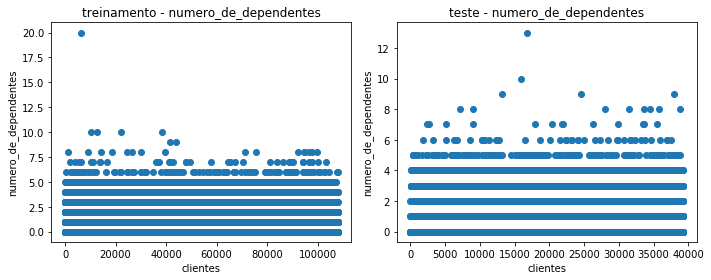

In [62]:
x1=np.linspace(0,tr_data.shape[0],tr_data.shape[0])
x2=np.linspace(0,tt_data.shape[0],tt_data.shape[0])
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].scatter(x1,tr_data['numero_de_dependentes'])
axs[0].set(title='treinamento - numero_de_dependentes',ylabel='numero_de_dependentes',xlabel='clientes')
axs[1].scatter(x2,tt_data['numero_de_dependentes'])
axs[1].set(title='teste - numero_de_dependentes',ylabel='numero_de_dependentes',xlabel='clientes')
a=plt.tight_layout()

In [63]:
tr_data['numero_de_dependentes'].quantile(0.9975)

5.0

In [64]:
threshold=0.9975
tr_data = tr_data[tr_data['numero_de_dependentes']<=tr_data['numero_de_dependentes'].quantile(threshold)]
tt_data = tt_data[tt_data['numero_de_dependentes']<=tt_data['numero_de_dependentes'].quantile(threshold)]

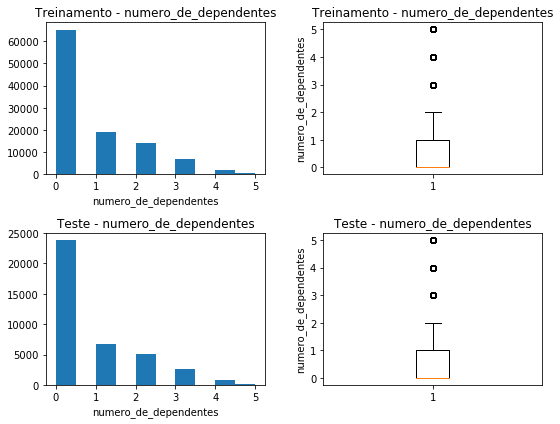

In [65]:
fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].hist(tr_data['numero_de_dependentes'])
ax[0,1].boxplot(tr_data['numero_de_dependentes'])

ax[1,0].hist(tt_data['numero_de_dependentes'])
ax[1,1].boxplot(tt_data['numero_de_dependentes'])

ax[0,0].set(title='Treinamento - numero_de_dependentes',xlabel='numero_de_dependentes')
ax[0,1].set(title='Treinamento - numero_de_dependentes',ylabel='numero_de_dependentes')
ax[1,0].set(title='Teste - numero_de_dependentes',xlabel='numero_de_dependentes')
ax[1,1].set(title='Teste - numero_de_dependentes',ylabel='numero_de_dependentes')
plt.tight_layout()

## 4. Desenvolvimento do modelo preditivo

In [66]:
tr_data.corr()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
inadimplente,1.000000,0.273960,-0.110468,0.264818,-0.016621,-0.050164,-0.029231,0.318501,-0.018729,0.256068,0.044222
util_linhas_inseguras,0.273960,1.000000,-0.274120,0.242358,-0.023665,-0.089341,-0.163799,0.264398,-0.079658,0.202716,0.090983
idade,-0.110468,-0.274120,1.000000,-0.074738,0.040492,0.101416,0.151587,-0.088795,0.036262,-0.073789,-0.217194
vezes_passou_de_30_59_dias,0.264818,0.242358,-0.074738,1.000000,-0.000619,-0.008778,0.074266,0.231957,0.031754,0.289557,0.068845
razao_debito,-0.016621,-0.023665,0.040492,-0.000619,1.000000,-0.010753,0.074070,-0.021287,0.185145,-0.009117,-0.089663
salario_mensal,-0.050164,-0.089341,0.101416,-0.008778,-0.010753,1.000000,0.226705,-0.058388,0.314707,-0.040228,0.152428
numero_linhas_crdto_aberto,-0.029231,-0.163799,0.151587,0.074266,0.074070,0.226705,1.000000,-0.111437,0.431699,-0.032787,0.078913
numero_vezes_passou_90_dias,0.318501,0.264398,-0.088795,0.231957,-0.021287,-0.058388,-0.111437,1.000000,-0.080151,0.286838,0.030344
numero_emprestimos_imobiliarios,-0.018729,-0.079658,0.036262,0.031754,0.185145,0.314707,0.431699,-0.080151,1.000000,-0.031277,0.142568
numero_de_vezes_que_passou_60_89_dias,0.256068,0.202716,-0.073789,0.289557,-0.009117,-0.040228,-0.032787,0.286838,-0.031277,1.000000,0.036715


In [67]:
X = np.asarray(tr_data[['util_linhas_inseguras', 'idade', 'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal', 'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias','numero_emprestimos_imobiliarios','numero_de_vezes_que_passou_60_89_dias','numero_de_dependentes']])
#X = np.asarray(tr_data[['util_linhas_inseguras','vezes_passou_de_30_59_dias', 'numero_vezes_passou_90_dias','numero_de_vezes_que_passou_60_89_dias']])

In [68]:
y=np.asarray(tr_data[['inadimplente']])

In [69]:
X = preprocessing.StandardScaler().fit(X).transform(X)


In [70]:
#X = preprocessing.MinMaxScaler().fit(X).transform(X)
#idade = []
#k=0
#media = X[:,1].mean()
#std = X[:,1].std()
#for i in X[:,1]:
#    k=(i-media)/std
#    idade.append(k)
#X[:,1]=idade
#X[:,1]

In [71]:
#X = preprocessing.RobustScaler().fit(X).transform(X)

In [72]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (75432, 10) (75432, 1)
Test set: (32329, 10) (32329, 1)


In [73]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

C:\Users\mbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [74]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.91433955, 0.08566045],
       [0.90479222, 0.09520778],
       [0.9831947 , 0.0168053 ],
       ...,
       [0.9747437 , 0.0252563 ],
       [0.97027295, 0.02972705],
       [0.86646656, 0.13353344]])

In [76]:
jaccard_score(y_test, yhat,pos_label=0)

0.9383764874910204

In [77]:
log_loss(y_test, yhat_prob)

0.18219333470769616

In [78]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     30277
           1       0.57      0.15      0.24      2052

    accuracy                           0.94     32329
   macro avg       0.76      0.57      0.60     32329
weighted avg       0.92      0.94      0.92     32329



## 5. Aplicação do modelo preditivo ao dataset de teste

In [79]:
file= 'teste.csv'
teste_data = pd.read_csv(file)
teste_data.shape

(40000, 11)

In [80]:
teste_data['salario_mensal']=teste_data['salario_mensal'].fillna(teste_data['salario_mensal'].mean())
teste_data['numero_de_dependentes']=teste_data['numero_de_dependentes'].fillna(stat.mode(teste_data['numero_de_dependentes']))
teste_data.shape


(40000, 11)

In [81]:
X_teste = np.asarray(teste_data[['util_linhas_inseguras', 'idade', 'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal', 'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias','numero_emprestimos_imobiliarios','numero_de_vezes_que_passou_60_89_dias','numero_de_dependentes']])
X_teste = preprocessing.StandardScaler().fit(X_teste).transform(X_teste)
yhat_teste = LR.predict_proba(X_teste)

In [82]:
yhat_teste

array([[0.97019318, 0.02980682],
       [0.97001409, 0.02998591],
       [0.94141277, 0.05858723],
       ...,
       [0.95923012, 0.04076988],
       [0.94897463, 0.05102537],
       [0.9572437 , 0.0427563 ]])

In [83]:
prob = list(yhat_teste[:,1])

In [84]:
teste_data.insert(loc=0,column='inadimplente',value=prob)

ValueError: cannot insert inadimplente, already exists

In [ ]:
teste_data.head()

In [ ]:
tr_data[tr_data['inadimplente']==1].count()/tr_data.shape[0]

In [ ]:
teste_data.to_csv('teste.csv',index=False)

In [ ]:
teste_data.to_excel('teste.xlsx',index=False)

# 6. Conclusão

Na sequência, analisa-se as respostas do modelo em relação a cada variável:
* util_linhas_inseguras: percebe-se que a probabilidade de inadimplência para os clientes aumenta de acordo com o aumento da variável - o que é coerente com o esperado. 
* idade: o resultado não demonstra uma relação clara entre a variável e a estimativa de inadimplência. Mas todos os valores acima de 80 foram classificados como adimplentes. Desconhece-se se isso é ou não esperado. 
* vezes_passou_30_59_dias: os valores extremos foram classificados como inadimplentes, o que condiz com o esperado.
* razao_debito: os valores elevados foram classificados como adimplentes, o que distoa do que seria esperado em situações práticas
* salario_mensal: foi observado que valores elevados da variável estão associados com adimplência, o que demonstra coerência. 
* numero_linhas_credito_aberto: o resultado não demonstra uma relação clara entre a variável e a estimativa de inadimplência. Mas valores maiores estão associados com adimplência. 
* numero_vezes_passou_90_dias: os valores extremos foram classificados como inadimplentes, o que condiz com o esperado.
* numero_emprestimos_imobiliarios: o resultado não demonstra uma relação clara entre a variável e a estimativa de inadimplência. Mas valores maiores estão associados com adimplência.
* numero_vezes_passou_60_89_dias: os valores extremos foram classificados como inadimplentes, o que condiz com o esperado.
* numero_de_dependentes: o resultado indica que pessoas com grande número de dependentes tendem a ser adimplentes. 

In [ ]:
x=np.linspace(0,teste_data.shape[0],teste_data.shape[0])
fig,axs=plt.subplots(10,figsize=(14,30))

for i in range(len(teste_data.columns)-1):
    axs[i].scatter(teste_data['inadimplente'],teste_data[teste_data.columns[i+1]])
    axs[i].set(title=teste_data.columns[i+1], xlabel='inadimplente')
plt.tight_layout()




Percebe-se, pelos gráficos, que o modelo apresenta um comportamento consideravelmente coerente quando aplicado aos dados de teste. Com o conhecimento atualmente disponível, acredita-se que o modelo apresenta comportamento promissor. Mas somente uma análise mais aprofundada é capaz de validar tal informação.